## Due April 11th 2025, 11:59pm

Instructions: Code can be added by `+Code` tab and text can be added by `+Text` tab whenever needed.

## Problem 1. [25 Points]

Grade calculator. Gives the following vectors that
contains your COE 301 records:

    homework = np.array([96, 105, 72, 85, 85, 90, 97, 95, 92, 80, 98, 91])
    quiz = np.array([5, 7, 5, 8, 3, 5])
    exam = np.array([76, 86]) # midterm is the first score
    weight1 = np.array([0.40, 0.1, 0.15, 0.35])
    weight2 = np.array([0.40, 0.1, 0.05, 0.45])

(a). The first array `homework` has length m that represents scores of m homework sets. The lowest score is excluded in the average homework score. if this number is larger than 100, set the average homework score to be 100.

(b). The second array quiz has length n+1 that represents the points you have earned from n quizzes and the total bonus points you have earned from class surveys (this is the last element in the array). The average quiz score is calculated as: first calculate the totalPoints you have earned from your highest (n-1) quizzes plus bonus points, then calculate the average quiz score as totalPoints/(n-1)/8*100. if this number is larger than 100, set the average quiz score to be 100.

(c). The third array exam has two elements that represent the scores of your mid-term and your final on a 100-piont scale.

(d). The fourth array weight1 has length 4 and each element represents the weight on homework, quiz, mid-term exam and final exam based on our original weighting strategy.

(e). The fifth array weight1 represents the weight on homework, quiz, mid-term exam and final exam based on our alternative weighting strategy.

Write a Python script to calculate the weighted score based on the two
weighting strategies without any loops [*Hint: `np.sort`*]. Do not hard-code the length of these arrays (assume m and n can change).

In [1]:
import numpy as np
homework = np.array([96, 105, 72, 85, 85, 90, 97, 95, 92, 80, 98, 91])
quiz = np.array([5, 7, 5, 8, 3, 5])
exam = np.array([76, 86]) # midterm is the first score
weight1 = np.array([0.40, 0.1, 0.15, 0.35])
weight2 = np.array([0.40, 0.1, 0.05, 0.45])

def calculate_weighted_score(homework, quiz, exam, weight):
  descendingHW = np.sort(homework)
  totalHW = np.sum(descendingHW[1:])
  averageHW = totalHW / (len(descendingHW) - 1)
  averageHW = min(averageHW, 100)
  descendingQuiz = np.sort(quiz[0:-1])
  totalQuiz = np.sum(descendingQuiz[1:])+quiz[-1]
  averageQuiz = totalQuiz / (len(descendingQuiz) -1) / 8 * 100
  averageQuiz = min(averageQuiz, 100)
  finalScores = np.dot(weight, np.array([averageHW, averageQuiz, exam[0], exam[1]]))
  return finalScores

print(calculate_weighted_score(homework, quiz, exam, weight1))
print(calculate_weighted_score(homework, quiz, exam, weight2))

87.74772727272727
88.74772727272727


## Problem 2 [25 Points]
The **PageRank** algorithm, used by search engines like Google, ranks websites based on the number of links pointing to them. You can represent a simplified web network as a stochastic matrix where each entry $M[i,j]$ is the probability that a user on page $j$ will click a link to page $i$.

Given the following matrix representing a small web network:
$$M = \begin{bmatrix}
0&0&1/2&0\\
1/3&0&0&1/2\\
1/3&1/2&0&1/2\\
1/3&1/2&1/2&0
\end{bmatrix}$$

Use the **power iteration** method that we discussed in Lecture 27 to approximate the dominant eigenvector of matrix $M$. Instead of initializing the rank vector to be a random vector, we initialize the rank vector to be all ones. Iterate until convergence with tolerance $1e-6$. What do the entries of the eigenvector represent? Based on the final PageRank scores, which page is ranked the highest and why?

In [7]:
import numpy.linalg as la
M = np.array([[0, 0, 1/2, 0],
              [1/3, 0, 0, 1/2],
              [1/3, 1/2, 0, 1/2],
              [1/3, 1/2, 1/2, 0]])
n = M.shape[0]
v = np.ones(n)
l_prev = v.T@M@v

while True:
  v = M@v
  v = v / la.norm(v)
  l = v.T@M@v
  if np.abs(l - l_prev) < 1e-6:
    break
  l_prev = l

print("Dominant Eigenvalue:", l)
print("Dominant Eigenvector:\n", v)

Dominant Eigenvalue: 1.0000001311967033
Dominant Eigenvector:
 [0.30460377 0.40613901 0.60920754 0.60920754]


Each entry in the dominant eigenvector corresponds to a webpage’s importance score. A higher value means the webpage is more important (i.e., it is likely to be visited more often when randomly clicking links). Based on the final PageRank scores, the third and fourth page are ranked the highest becasue they have the largest importance score.

## Problem 3 [25 Points]
**Dimension reduction via PCA**. We learned how to compress a grayscale figure in Lecture 27. Now let's compress a color figure. Import the same picture "panda_huahua.jped" as a numpy matrix $A$ using `imread`. Without converting RGB to grayscale using `np.mean`, we can check the shape of $A$. It should be a triple of the picture resolution size, with each layer representing RGB.

(a). Stack the $3$ RGB layers by reshape $A$ to a long matrix $X$, i.e.
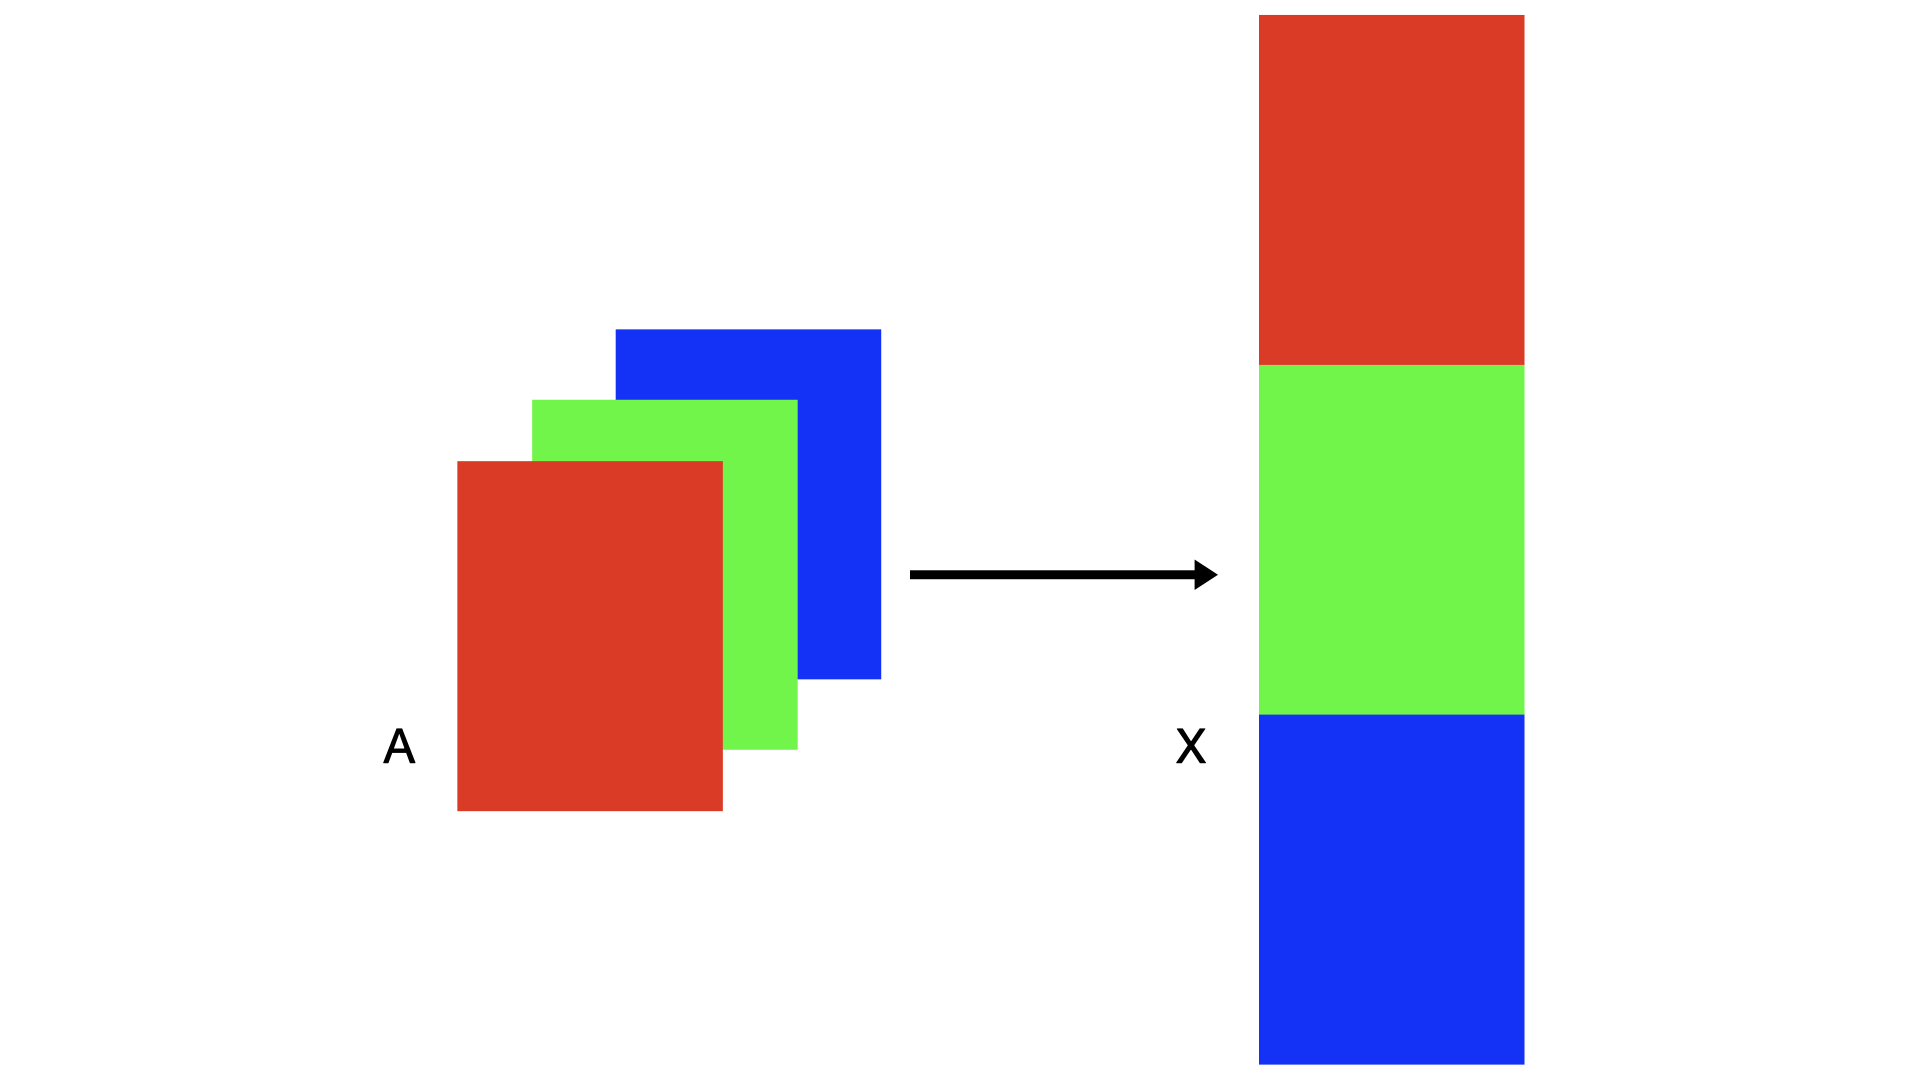

(b). Conduct PCA to the data matrix $X$ as in class, compute the low rank approximation matrices $Xapprox$ of rank $10,50,200$, reshape each to $Aapprox$ which has the same shape as $A$ (i.e., three layers of RGB). Visualize $Aapprox$ using `imshow` to check the quality of the compressed figure with different ranks.

Note: When you run into warning of "clipping input data to the valid range for imshow with RGB data", you need to normalize $Aapprox$ to the range [0,1]. Think about how we can do this.

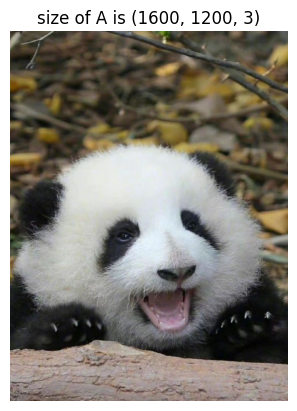

In [8]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

A = imread('panda_huahua.jpeg')
plt.figure
plt.imshow(A)
plt.axis('off')
plt.title('size of A is '+str(A.shape))
plt.show()

In [9]:
X = A.reshape((A.shape[0]*A.shape[2],A.shape[1]))# X should be a matrix of shape (4800,1200)
print(X.shape)
U,S,VT = la.svd(X)
S = np.diag(S)

(4800, 1200)


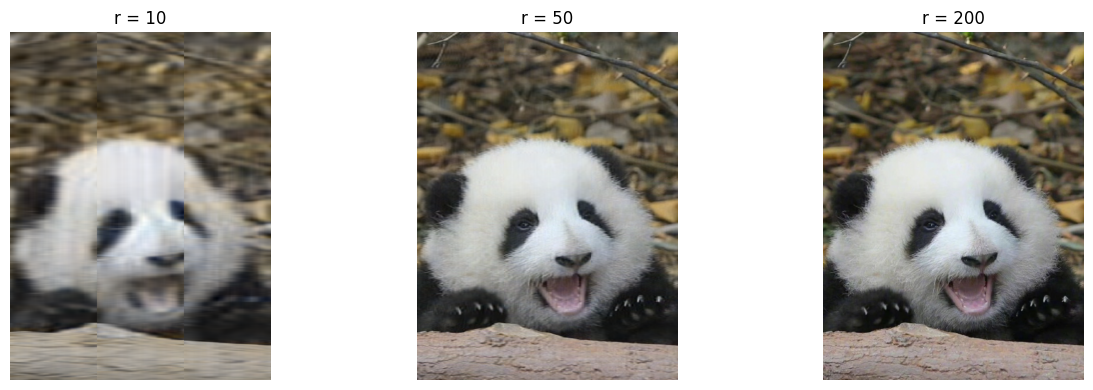

In [10]:
j = 1
fig = plt.figure(figsize=(13,4))
for r in (10,50,200):
    Xapprox = U[:,:r] @ S[0:r,:r] @VT[:r,:]# Construct approximate image
    Aapprox = (Xapprox.reshape(A.shape)-np.min(Xapprox))/(np.max(Xapprox)-np.min(Xapprox))
    plt.subplot(1,3,j)
    j += 1
    plt.imshow(Aapprox)
    plt.axis('off')
    plt.title('r = ' +str(r))

plt.tight_layout()
plt.show()

## Problem 4 [25 Points]
**Linear Regression via Least Squares**: A real estate company wants to predict house prices based on features like square footage, number of bedrooms, and age of the house. The company has
the following dataset:

$$X = \begin{bmatrix}
Square Footage &Bedrooms &Age (years)\\
2100 &3 &20\\
2500 &4 &15\\
1800 &2 &30\\
2200 &3 &25
\end{bmatrix}$$

The corresponding house prices (in \$1000s) are:
$$y =
\begin{bmatrix}
460\\
540\\
330\\
400\\
\end{bmatrix}$$

(a). Set up the system as a least-squares problem $X\beta = y$, where $\beta$ represents the coefficients (weights) for square footage, bedrooms, and age.

(b). Solve for $\beta$ using NumPy’s `np.linalg.lstsq()`.

(c) Use the resulting model to predict the price of a house with 2400 square feet, 3 bedrooms, and 20 years old.

(d). Discuss the role of the least-squares method in this prediction task and compare its performance to an alternative method (such as direct solution via `np.linalg.solve()`)


In [2]:
X = np.array([[2100, 3, 20],
              [2500, 4, 15],
              [1800, 2, 30],
              [2200, 3, 25]])
y = np.array([460,540,330,400])
beta = np.linalg.lstsq(X, y, rcond=None)[0]
print(beta)
xnew = np.array([2400,3,20])
ynew = np.dot(xnew, beta)
print(ynew)

[    3.2875 -1628.75     -77.75  ]
1448.7500000000234


`np.linalg.lstsq()` can solve this overdetermined system with a best approximation solution by minimizing the sum of squared residuals. We can not use `np.linalg.solve` for this because $X$ is not a square matrix and we do not have a unique solution for this system.